Demo 01: Manejo de Valores Faltantes
=====================================
Esta demostración muestra técnicas básicas para identificar y manejar
valores faltantes en datos de producción petrolera.


In [ ]:
%pip install pandas numpy matplotlib seaborn

In [3]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
print("=" * 60)
print("DEMO 01: MANEJO DE VALORES FALTANTES")
print("=" * 60)

# Cargar datos
print("\n1. CARGANDO DATOS DE PRODUCCIÓN")
print("-" * 40)
df = pd.read_csv('/workspaces/CursoPython-Basico-JuanDavid/Sesión_14/datos/produccion_diaria.csv')
print(f"Dataset cargado: {df.shape[0]} filas, {df.shape[1]} columnas")
print(f"Columnas: {list(df.columns)}")

DEMO 01: MANEJO DE VALORES FALTANTES

1. CARGANDO DATOS DE PRODUCCIÓN
----------------------------------------
Dataset cargado: 365 filas, 8 columnas
Columnas: ['fecha', 'pozo_id', 'produccion_oil_bbl', 'produccion_gas_mcf', 'produccion_agua_bbl', 'presion_boca_psi', 'temperatura_f', 'horas_operacion']


Exploración inicial

In [5]:
# Exploración inicial
print("\n2. EXPLORACIÓN INICIAL")
print("-" * 40)
print("\nPrimeras 5 filas:")
print(df.head())

print("\nInformación del dataset:")
print(df.info())


2. EXPLORACIÓN INICIAL
----------------------------------------

Primeras 5 filas:
        fecha   pozo_id  produccion_oil_bbl  produccion_gas_mcf  \
0  2023-01-01  POZO-003               593.6              2435.0   
1  2023-01-02  POZO-004               519.8              2313.0   
2  2023-01-03  POZO-001               468.7              2111.0   
3  2023-01-04  POZO-003               473.9              2417.0   
4  2023-01-05  POZO-003               500.7              2278.0   

   produccion_agua_bbl  presion_boca_psi  temperatura_f  horas_operacion  
0                 96.4            1459.0          177.6            22.41  
1                 64.8            1539.0          191.5            22.37  
2                 98.6            1620.0          184.0            23.23  
3                 96.2            1568.0          171.2            21.91  
4                  NaN            1473.0          178.0            23.98  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>

Análisis de valores faltantes

In [6]:
print("\n3. ANÁLISIS DE VALORES FALTANTES")
print("-" * 40)
# Conteo de valores faltantes por columna
valores_faltantes = df.isnull().sum()
porcentaje_faltantes = (valores_faltantes / len(df)) * 100

print("\nValores faltantes por columna:")
for col in df.columns:
    if valores_faltantes[col] > 0:
        print(f"  {col}: {valores_faltantes[col]} ({porcentaje_faltantes[col]:.1f}%)")


3. ANÁLISIS DE VALORES FALTANTES
----------------------------------------

Valores faltantes por columna:
  produccion_oil_bbl: 18 (4.9%)
  produccion_gas_mcf: 17 (4.7%)
  produccion_agua_bbl: 18 (4.9%)
  presion_boca_psi: 10 (2.7%)
  temperatura_f: 22 (6.0%)


Visualización de patrones de valores faltantes


4. VISUALIZACIÓN DE PATRONES
----------------------------------------
Gráfico guardado como 'valores_faltantes_analisis.png'


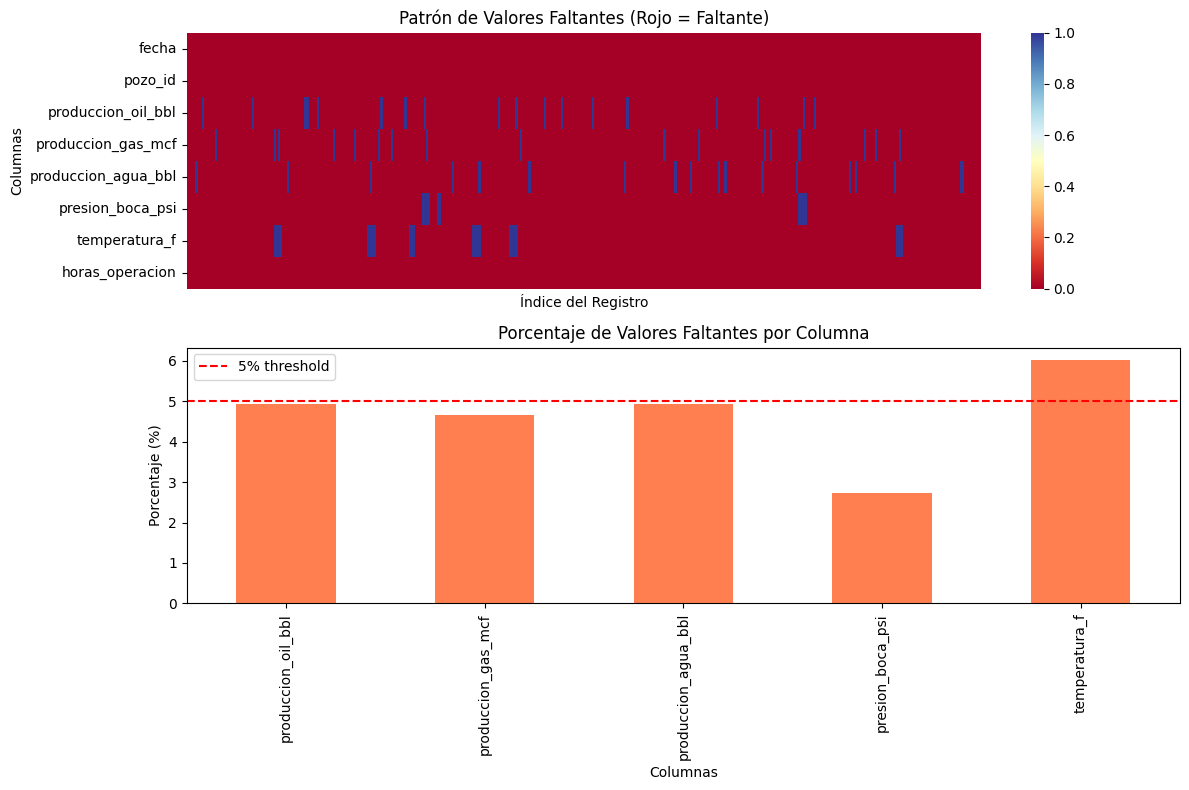

In [7]:
print("\n4. VISUALIZACIÓN DE PATRONES")
print("-" * 40)

fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Heatmap de valores faltantes
ax1 = axes[0]
missing_data = df.isnull().astype(int)
sns.heatmap(missing_data.T, cmap='RdYlBu', cbar=True, ax=ax1,
            yticklabels=True, xticklabels=False)
ax1.set_title('Patrón de Valores Faltantes (Rojo = Faltante)')
ax1.set_xlabel('Índice del Registro')
ax1.set_ylabel('Columnas')

# Barplot de porcentaje de valores faltantes
ax2 = axes[1]
porcentaje_faltantes[porcentaje_faltantes > 0].plot(kind='bar', ax=ax2, color='coral')
ax2.set_title('Porcentaje de Valores Faltantes por Columna')
ax2.set_xlabel('Columnas')
ax2.set_ylabel('Porcentaje (%)')
ax2.axhline(y=5, color='r', linestyle='--', label='5% threshold')
ax2.legend()

plt.tight_layout()
plt.savefig('valores_faltantes_analisis.png')
print("Gráfico guardado como 'valores_faltantes_analisis.png'")

Técnicas de imputación

Técnica 1 eliminacion de filas 

In [8]:
print("\n5. TÉCNICAS DE IMPUTACIÓN")
print("-" * 40)

# Crear copia para preservar original
df_imputado = df.copy()

# Técnica 1: Eliminación de filas con valores faltantes
print("\nTécnica 1: Eliminación de filas")
df_sin_na = df.dropna()
print(f"  Registros originales: {len(df)}")
print(f"  Registros después de eliminar NaN: {len(df_sin_na)}")
print(f"  Registros perdidos: {len(df) - len(df_sin_na)} ({((len(df) - len(df_sin_na))/len(df)*100):.1f}%)")



5. TÉCNICAS DE IMPUTACIÓN
----------------------------------------

Técnica 1: Eliminación de filas
  Registros originales: 365
  Registros después de eliminar NaN: 290
  Registros perdidos: 75 (20.5%)


 Técnica 2: Imputación con media (para variables numéricas continuas)

In [9]:
# Técnica 2: Imputación con media (para variables numéricas continuas)
print("\nTécnica 2: Imputación con media")
columnas_numericas = ['produccion_oil_bbl', 'produccion_gas_mcf', 
                      'produccion_agua_bbl', 'presion_boca_psi', 'temperatura_f']

for col in columnas_numericas:
    if df_imputado[col].isnull().sum() > 0:
        media = df_imputado[col].mean()
        valores_imputados = df_imputado[col].isnull().sum()
        df_imputado[col].fillna(media, inplace=True)
        print(f"  {col}: {valores_imputados} valores imputados con media={media:.2f}")


Técnica 2: Imputación con media
  produccion_oil_bbl: 18 valores imputados con media=474.01
  produccion_gas_mcf: 17 valores imputados con media=1941.09
  produccion_agua_bbl: 18 valores imputados con media=99.28
  presion_boca_psi: 10 valores imputados con media=1499.64
  temperatura_f: 22 valores imputados con media=179.65


/tmp/ipykernel_11751/4175153952.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputado[col].fillna(media, inplace=True)


Técnica 3: Forward fill para series temporales

In [10]:
# Técnica 3: Forward fill para series temporales
print("\nTécnica 3: Forward Fill (para series temporales)")
df_ffill = df.copy()
df_ffill['fecha'] = pd.to_datetime(df_ffill['fecha'])
df_ffill = df_ffill.sort_values(['pozo_id', 'fecha'])

for col in ['presion_boca_psi', 'temperatura_f']:
    valores_antes = df_ffill[col].isnull().sum()
    df_ffill[col] = df_ffill.groupby('pozo_id')[col].transform(lambda x: x.ffill())
    valores_despues = df_ffill[col].isnull().sum()
    print(f"  {col}: {valores_antes - valores_despues} valores imputados con forward fill")


Técnica 3: Forward Fill (para series temporales)
  presion_boca_psi: 10 valores imputados con forward fill
  temperatura_f: 22 valores imputados con forward fill


Técnica 4: Interpolación lineal

In [11]:
# Técnica 4: Interpolación lineal
print("\nTécnica 4: Interpolación lineal")
df_interpolado = df.copy()
df_interpolado['fecha'] = pd.to_datetime(df_interpolado['fecha'])
df_interpolado = df_interpolado.sort_values(['pozo_id', 'fecha'])

for col in ['produccion_oil_bbl', 'produccion_gas_mcf']:
    valores_antes = df_interpolado[col].isnull().sum()
    df_interpolado[col] = df_interpolado.groupby('pozo_id')[col].transform(lambda x: x.interpolate(method='linear'))
    valores_despues = df_interpolado[col].isnull().sum()
    print(f"  {col}: {valores_antes - valores_despues} valores interpolados")


Técnica 4: Interpolación lineal
  produccion_oil_bbl: 18 valores interpolados
  produccion_gas_mcf: 17 valores interpolados


Comparación de métodos


6. COMPARACIÓN DE RESULTADOS
----------------------------------------

Estadísticas de 'produccion_oil_bbl':
  Original - Media: 474.01, Std: 113.02
  Imputado (media) - Media: 474.01, Std: 110.19
  Interpolado - Media: 473.74, Std: 111.22

Gráfico guardado como 'comparacion_imputacion.png'


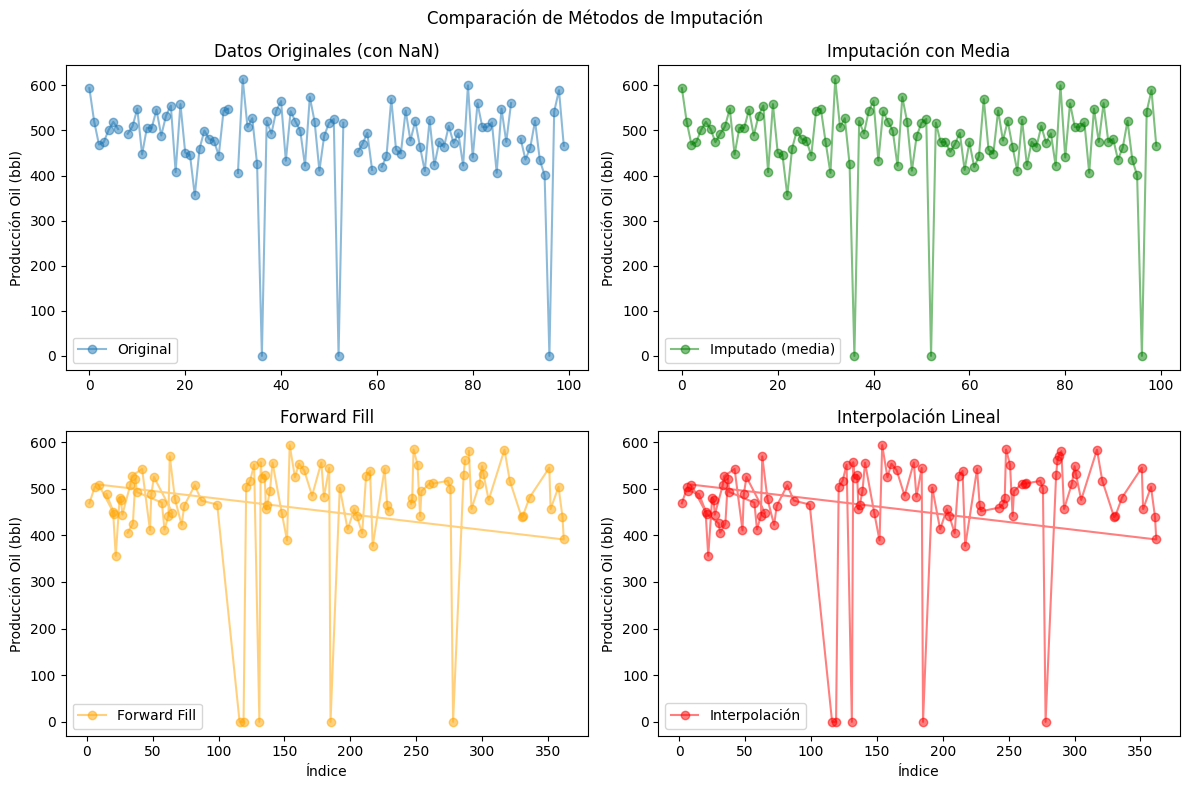

In [12]:
# Comparación de métodos
print("\n6. COMPARACIÓN DE RESULTADOS")
print("-" * 40)

# Estadísticas antes y después
print("\nEstadísticas de 'produccion_oil_bbl':")
print(f"  Original - Media: {df['produccion_oil_bbl'].mean():.2f}, Std: {df['produccion_oil_bbl'].std():.2f}")
print(f"  Imputado (media) - Media: {df_imputado['produccion_oil_bbl'].mean():.2f}, Std: {df_imputado['produccion_oil_bbl'].std():.2f}")
print(f"  Interpolado - Media: {df_interpolado['produccion_oil_bbl'].mean():.2f}, Std: {df_interpolado['produccion_oil_bbl'].std():.2f}")

# Visualizar el efecto de la imputación
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Original con NaN
axes[0, 0].plot(df['produccion_oil_bbl'].iloc[:100], 'o-', alpha=0.5, label='Original')
axes[0, 0].set_title('Datos Originales (con NaN)')
axes[0, 0].set_ylabel('Producción Oil (bbl)')
axes[0, 0].legend()

# Imputación con media
axes[0, 1].plot(df_imputado['produccion_oil_bbl'].iloc[:100], 'o-', alpha=0.5, 
                label='Imputado (media)', color='green')
axes[0, 1].set_title('Imputación con Media')
axes[0, 1].set_ylabel('Producción Oil (bbl)')
axes[0, 1].legend()

# Forward fill
axes[1, 0].plot(df_ffill['produccion_oil_bbl'].iloc[:100], 'o-', alpha=0.5,
                label='Forward Fill', color='orange')
axes[1, 0].set_title('Forward Fill')
axes[1, 0].set_ylabel('Producción Oil (bbl)')
axes[1, 0].set_xlabel('Índice')
axes[1, 0].legend()

# Interpolación
axes[1, 1].plot(df_interpolado['produccion_oil_bbl'].iloc[:100], 'o-', alpha=0.5,
                label='Interpolación', color='red')
axes[1, 1].set_title('Interpolación Lineal')
axes[1, 1].set_ylabel('Producción Oil (bbl)')
axes[1, 1].set_xlabel('Índice')
axes[1, 1].legend()

plt.suptitle('Comparación de Métodos de Imputación')
plt.tight_layout()
plt.savefig('comparacion_imputacion.png')
print("\nGráfico guardado como 'comparacion_imputacion.png'")

Recomendaciones

In [13]:
# Recomendaciones
print("\n7. RECOMENDACIONES PARA LA INDUSTRIA")
print("-" * 40)
print("""
Para datos de producción petrolera:

1. VALORES OPERACIONALES (presión, temperatura):
   - Usar forward fill o interpolación para gaps cortos
   - Considerar el contexto operacional (paradas planificadas)

2. DATOS DE PRODUCCIÓN (oil, gas, agua):
   - Interpolación para tendencias suaves
   - Cero para paradas conocidas del pozo

3. DATOS DE SENSORES:
   - Forward fill para lecturas frecuentes
   - Validar contra rangos operacionales normales

4. REGLA GENERAL:
   - Si < 5% faltante: imputación apropiada
   - Si > 20% faltante: considerar excluir la variable
   - Siempre documentar el método usado
""")


7. RECOMENDACIONES PARA LA INDUSTRIA
----------------------------------------

Para datos de producción petrolera:

1. VALORES OPERACIONALES (presión, temperatura):
   - Usar forward fill o interpolación para gaps cortos
   - Considerar el contexto operacional (paradas planificadas)

2. DATOS DE PRODUCCIÓN (oil, gas, agua):
   - Interpolación para tendencias suaves
   - Cero para paradas conocidas del pozo

3. DATOS DE SENSORES:
   - Forward fill para lecturas frecuentes
   - Validar contra rangos operacionales normales

4. REGLA GENERAL:
   - Si < 5% faltante: imputación apropiada
   - Si > 20% faltante: considerar excluir la variable
   - Siempre documentar el método usado



Guardar dataset limpio

In [15]:
# Guardar dataset limpio
df_interpolado.to_csv('/workspaces/CursoPython-Basico-JuanDavid/Sesión_14/datos/produccion_diaria_limpia.csv', index=False)
print("\nDataset limpio guardado como 'produccion_diaria_limpia.csv'")

print("\n" + "=" * 60)
print("DEMO COMPLETADA")
print("=" * 60)


Dataset limpio guardado como 'produccion_diaria_limpia.csv'

DEMO COMPLETADA
